In [1]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

# 計算グラフを定義
with g.as_default():
    # テンソルt1, t2, t3を定義
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])

    # テンソルt1, t2, t3の階数を取得
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)

    # テンソルt1, t2, t3の形状を取得
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print('Shapes:', s1, s2, s3)

with tf.compat.v1.Session(graph=g) as sess:
    print('Ranks:',
          r1.eval(),
          r2.eval(),
          r3.eval())


Shapes: () (4,) (2, 2)
Ranks: 0 1 2


In [2]:
g = tf.Graph()

# 計算グラフにノードを追加
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2 * (a - b) + c

In [3]:
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))


2*(a-b)+c =>  1


In [4]:
g = tf.Graph()

with g.as_default():
    tf_a = tf.compat.v1.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.compat.v1.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.compat.v1.placeholder(tf.int32, shape=[], name='tf_c')
    # 中間のテンソルを格納
    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c

In [5]:
with tf.compat.v1.Session(graph=g) as sess:
    feed = {tf_a: 1, tf_b: 2, tf_c: 3}
    print('z:', sess.run(z, feed_dict=feed))

z: 1


In [6]:
with tf.compat.v1.Session(graph=g) as sess:
    feed = {tf_a: 1, tf_b: 2}
    print('r1:', sess.run(r1, feed_dict=feed))
    print('r2:', sess.run(r2, feed_dict=feed))
    feed = {tf_a: 1, tf_b: 2, tf_c: 3}
    print('r1:', sess.run(r1, feed_dict=feed))
    print('r2:', sess.run(r2, feed_dict=feed))

r1: -1
r2: -2
r1: -1
r2: -2


In [7]:
with g.as_default():
    tf_x = tf.compat.v1.placeholder(tf.float32, shape=[None, 2], name='tf_x')
    x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')

In [8]:
np.random.seed(123)
np.set_printoptions(precision=2)

In [9]:
with tf.compat.v1.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0, high=1, size=(5, 2))
    print('Feeding data with shape ', x1.shape)
    print('Result:', sess.run(x_mean, feed_dict={tf_x: x1}))
    x2 = np.random.uniform(low=0, high=1, size=(10, 2))
    print('Feeding data with shape ', x2.shape)
    print('Result:', sess.run(x_mean, feed_dict={tf_x: x2}))

Feeding data with shape  (5, 2)
Result: [0.62 0.47]
Feeding data with shape  (10, 2)
Result: [0.46 0.49]


In [10]:
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1, 2, 3, 4], [5, 6, 7, 8]], dtype=np.int64), name='w')
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64>


In [11]:
with tf.compat.v1.Session(graph=g1) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


In [12]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name='w1')
    init_op = tf.compat.v1.global_variables_initializer()
    w2 = tf.Variable(2, name='w2')

In [13]:
with tf.compat.v1.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w1:', sess.run(w1))

w1: 1


In [14]:
with tf.compat.v1.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w2:', sess.run(w2))

FailedPreconditionError: Could not find variable w2. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status=Not found: Resource localhost/w2/class tensorflow::Var does not exist.
	 [[node w2/Read/ReadVariableOp (defined at <ipython-input-12-28a523a53f0d>:6) ]]

Original stack trace for 'w2/Read/ReadVariableOp':
  File "c:\users\1023d\.pyenv\pyenv-win\versions\3.8.2\lib\runpy.py", line 193, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\1023d\.pyenv\pyenv-win\versions\3.8.2\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "c:\users\1023d\.pyenv\pyenv-win\versions\3.8.2\lib\asyncio\windows_events.py", line 316, in run_forever
    super().run_forever()
  File "c:\users\1023d\.pyenv\pyenv-win\versions\3.8.2\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "c:\users\1023d\.pyenv\pyenv-win\versions\3.8.2\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "c:\users\1023d\.pyenv\pyenv-win\versions\3.8.2\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\kernelbase.py", line 374, in dispatch_queue
    yield self.process_one()
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 250, in wrapper
    runner = Runner(ctx_run, result, future, yielded)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 741, in __init__
    self.ctx_run(self.run)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\kernelbase.py", line 358, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
    self.do_execute(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in run_cell
    result = self._run_cell(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\IPython\core\interactiveshell.py", line 2932, in _run_cell
    return runner(coro)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\IPython\core\interactiveshell.py", line 3155, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\IPython\core\interactiveshell.py", line 3347, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-28a523a53f0d>", line 6, in <module>
    w2 = tf.Variable(2, name='w2')
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\variables.py", line 262, in __call__
    return cls._variable_v2_call(*args, **kwargs)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\variables.py", line 244, in _variable_v2_call
    return previous_getter(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\variables.py", line 237, in <lambda>
    previous_getter = lambda **kws: default_variable_creator_v2(None, **kws)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2662, in default_variable_creator_v2
    return resource_variable_ops.ResourceVariable(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\variables.py", line 264, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1584, in __init__
    self._init_from_args(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1777, in _init_from_args
    value = gen_resource_variable_ops.read_variable_op(handle, dtype)
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 483, in read_variable_op
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\framework\ops.py", line 3557, in _create_op_internal
    ret = Operation(
  File "c:\users\1023d\.virtualenvs\pythonmachinelearning-qwvwlql2\lib\site-packages\tensorflow\python\framework\ops.py", line 2045, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


In [15]:
g = tf.Graph()

with g.as_default():
    with tf.compat.v1.variable_scope('net_A'):
        with tf.compat.v1.variable_scope('layer-1'):
            w1 = tf.Variable(tf.compat.v1.random_normal(shape=(10, 4)),
                             name='weights')
        with tf.compat.v1.variable_scope('layer-2'):
            w2 = tf.Variable(tf.compat.v1.random_normal(shape=(20, 10)),
                             name='weights')
    with tf.compat.v1.variable_scope('net_B'):
        with tf.compat.v1.variable_scope('layer-1'):
            w3 = tf.Variable(tf.compat.v1.random_normal(shape=(10, 4)),
                             name='weights')

    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32>


In [16]:
# 分類器を構築するヘルパー関数
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.compat.v1.get_variable(name='wights',
                                        shape=(data_shape[1], n_classes),
                                        dtype=tf.float32)
    bias = tf.compat.v1.get_variable(name='bias',
                                     initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights),
                    bias,
                    name='logits')
    return logits, tf.nn.softmax(logits)


# ジェネレータを構築するヘルパー関数
def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.compat.v1.random_normal(shape=(data_shape[1], n_hidden)),
                     name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1,
                    name='hidden_pre_activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
    w2 = tf.Variable(tf.compat.v1.random_normal(shape=(n_hidden, data_shape[1])),
                     name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)


# 計算グラフの構築
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.compat.v1.placeholder(shape=(batch_size, 100),
                                    dtype=tf.float32,
                                    name='tf_X')

    # ジェネレータを構築
    with tf.compat.v1.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)

    # 分類器を構築
    with tf.compat.v1.variable_scope('classifier') as scope:
        # 元のデータに対する分類器
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(shape=batch_size))

        # 生成されたデータに対して分類器を再利用
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(shape=batch_size))
        init_op = tf.compat.v1.global_variables_initializer()

In [17]:
g = tf.Graph()

with g.as_default():
    tf_X = tf.compat.v1.placeholder(shape=(batch_size, 100),
                                    dtype=tf.float32,
                                    name='tf_X')

    # ジェネレータを構築
    with tf.compat.v1.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)

    # 分類器を構築
    with tf.compat.v1.variable_scope('classifier'):
        # 元のデータに対する分類器
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(shape=batch_size))

    with tf.compat.v1.variable_scope('classifier', reuse=True):
        # 生成されたデータに対して分類器を再利用
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(shape=batch_size))
        init_op = tf.compat.v1.global_variables_initializer()

In [18]:
g = tf.Graph()

with g.as_default():
    tf.compat.v1.set_random_seed(123)

    tf_x = tf.compat.v1.placeholder(shape=None, dtype=tf.float32, name='tf_x')
    tf_y = tf.compat.v1.placeholder(shape=None, dtype=tf.float32, name='tf_y')

    weight = tf.Variable(tf.compat.v1.random_normal(shape=(1, 1), stddev=0.25),
                         name='weight')
    bias = tf.Variable(0.0, name='bias')

    y_hat = tf.add(weight * tf_x, bias, name='y_hat')

    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')

    optim = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')


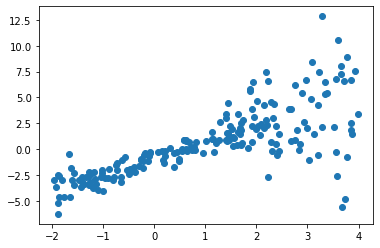

In [30]:
import matplotlib.pyplot as plt

np.random.seed(0)


def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t * t / 3), size=None)
        y.append(r)
    return x, 1.726 * x - 0.84 + np.array(y)


x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

Epoch    0: 10.0121
Epoch   50: 7.3338
Epoch  100: 6.0509
Epoch  150: 5.4111
Epoch  200: 5.0714
Epoch  250: 4.8749
Epoch  300: 4.7494
Epoch  350: 4.6613
Epoch  400: 4.5946
Epoch  450: 4.5414


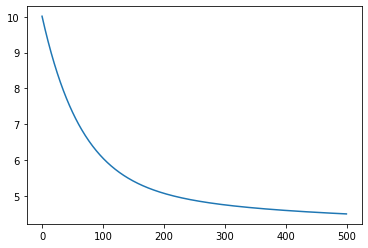

In [31]:
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 500
training_cost = []

with tf.compat.v1.Session(graph=g) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op],
                        feed_dict={tf_x: x_train, tf_y: y_train})
        training_cost.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))

plt.plot(training_cost)
plt.show()

In [32]:

n_epochs = 500
training_cost = []

with tf.compat.v1.Session(graph=g) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'],
                        feed_dict={'tf_x:0': x_train, 'tf_y:0': y_train})
        training_cost.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))

Epoch    0: 10.0121
Epoch   50: 7.3338
Epoch  100: 6.0509
Epoch  150: 5.4111
Epoch  200: 5.0714
Epoch  250: 4.8749
Epoch  300: 4.7494
Epoch  350: 4.6613
Epoch  400: 4.5946
Epoch  450: 4.5414


In [34]:
with g.as_default():
    saver = tf.compat.v1.train.Saver()

ValueError: At least two variables have the same name: bias

In [35]:
n_epochs = 500
training_costs = []

with tf.compat.v1.Session(graph=g) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op],
                        feed_dict={tf_x: x_train,
                                   tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epochs %4d: %.4d' % (e, c))

    saver.save(sess, './trained-model')

Epochs    0: 0010
Epochs   50: 0007
Epochs  100: 0006
Epochs  150: 0005
Epochs  200: 0005
Epochs  250: 0004
Epochs  300: 0004
Epochs  350: 0004
Epochs  400: 0004
Epochs  450: 0004


In [36]:
with tf.compat.v1.Session(graph=g) as sess:
    new_saver = tf.compat.v1.train.import_meta_graph('./trained-model.meta')

In [37]:
g2 = tf.Graph()

with tf.compat.v1.Session(graph=g2) as sess:
    new_saver = tf.compat.v1.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0': x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


INFO:tensorflow:Restoring parameters from ./trained-model


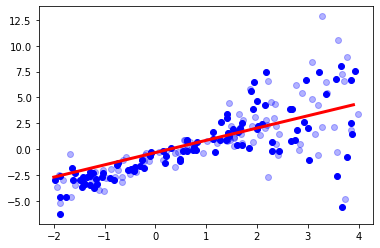

In [38]:
x_arr = np.arange(-2, 4, 0.1)

g2 = tf.Graph()

with tf.compat.v1.Session(graph=g) as sess:
    new_saver = tf.compat.v1.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    y_arr = sess.run('y_hat:0', feed_dict={'tf_x:0': x_arr})

plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()

In [39]:
g = tf.Graph()

with g.as_default():
    arr = np.array([[1., 2., 3., 3.5],
                    [4., 5., 6., 6.5],
                    [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is', s)
    T2 = tf.Variable(tf.compat.v1.random_normal(shape=s))
    print(T2)
    T3 = tf.Variable(tf.compat.v1.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32>


In [44]:
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1], name='T4')
    print(T4)
    T5 = tf.reshape(T1, shape=[1, 3, -1], name='T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [45]:
with tf.compat.v1.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [46]:
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], name='T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0, 2, 1], name='T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


In [47]:
with g.as_default():
    t5_splt = tf.split(T5, num_or_size_splits=2, axis=2, name='T8')
    print(t5_splt)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [50]:
g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape=(5, 1), dtype=tf.float32, name='t1')
    t2 = tf.zeros(shape=(5, 1), dtype=tf.float32, name='t2')
    print(t1)
    print(t2)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)


In [51]:
with g.as_default():
    t3 = tf.compat.v1.concat([t1, t2], axis=0, name='t3')
    print(t3)
    t4 = tf.compat.v1.concat([t1, t2], axis=1, name='t4')
    print(t4)

Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [52]:
with tf.compat.v1.Session(graph=g) as sess:
    print(sess.run(t3))
    print()
    print(sess.run(t4))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [53]:
x, y = 1.0, 2.0
g = tf.Graph()

with g.as_default():
    tf_x = tf.compat.v1.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.compat.v1.placeholder(dtype=tf.float32, shape=None, name='tf_y')
    if x < y:
        res = tf.add(tf_x, tf_y, name='result_add')
    else:
        res = tf.subtract(tf_x, tf_y, name='result_sub')
    print('Object:', res)

Object: Tensor("result_add:0", dtype=float32)


In [54]:
with tf.compat.v1.Session(graph=g) as sess:
    print('x , y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))
    x, y = 2.0, 1.0
    print('x , y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))

x , y: True -> Result: 3.0
x , y: False -> Result: 3.0


In [55]:
x, y = 1.0, 2.0
g = tf.Graph()

with g.as_default():
    tf_x = tf.compat.v1.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.compat.v1.placeholder(dtype=tf.float32, shape=None, name='tf_y')
    res = tf.cond(tf_x < tf_y,
                  lambda: tf.add(tf_x, tf_y, name='result_add'),
                  lambda: tf.subtract(tf_x, tf_y, name='result_sub'))
    print('Object:', res)

Object: Tensor("cond/Identity:0", dtype=float32)


In [56]:
with tf.compat.v1.Session(graph=g) as sess:
    print('x , y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))
    x, y = 2.0, 1.0
    print('x , y: %s -> Result:' % (x < y),
          res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))

x , y: True -> Result: 3.0
x , y: False -> Result: 1.0


In [57]:
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.compat.v1.placeholder(shape=(batch_size, 100),
                                    dtype=tf.float32,
                                    name='tf_X')

    # ジェネレータを構築
    with tf.compat.v1.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)

    # 分類器を構築
    with tf.compat.v1.variable_scope('classifier') as scope:
        # 元のデータに対する分類器
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(shape=batch_size))

        # 生成されたデータに対して分類器を再利用
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(shape=batch_size))

In [60]:
with tf.compat.v1.session(graph=g) as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    file_writer = tf.compat.v1.summary.filewriter(logdir='./logs/', graph=g)

Help on function create_file_writer_v2 in module tensorflow.python.ops.summary_ops_v2:

create_file_writer_v2(logdir, max_queue=None, flush_millis=None, filename_suffix=None, name=None)
    Creates a summary file writer for the given log directory.
    
    Args:
      logdir: a string specifying the directory in which to write an event file.
      max_queue: the largest number of summaries to keep in a queue; will
       flush once the queue gets bigger than this. Defaults to 10.
      flush_millis: the largest interval between flushes. Defaults to 120,000.
      filename_suffix: optional suffix for the event file name. Defaults to `.v2`.
      name: a name for the op that creates the writer.
    
    Returns:
      A SummaryWriter object.

